In [1]:
from wave_circuit import *

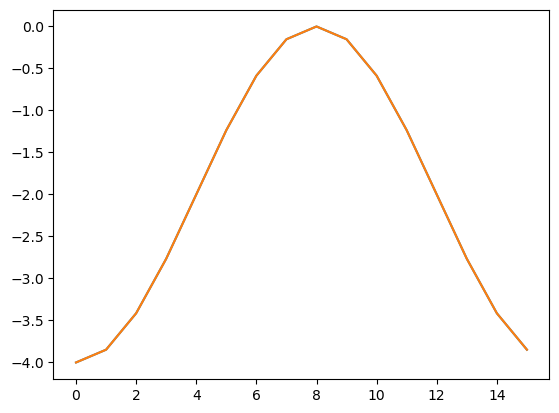

In [15]:
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt
U = Operator(SQFT_circuit(4).reverse_bits()).data
O = L_P(2**4)
plt.plot(np.diag(U.conjugate().T @ O @ U).real)
plt.plot(spectrum_P(16))

In [3]:
import scipy
n = 4
t = 0.1
O1 = scipy.linalg.expm(-1j * t * linear_Ham_P(2**n) )

In [306]:
O2 = Operator(evolve_circ_P(n,0.1).reverse_bits()).data

In [307]:
abs(np.trace(O1.T.conjugate() @ O2))

np.float64(31.999999999999968)

In [281]:
evolve_circ_P(5,0.1).draw(fold=-1)

┌───┐┌────────────┐                                                                                                                                                                                                                                      ┌───┐                                                                                                       
q_0: ┤ H ├┤ P(-20.106) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■───────────■───────────────■──────────────■──────────────────■──────────┤ H ├───────────────────────────────────────────────────────────────────────────────────────────────────────
     ├───┤└───┬───┬────┘                                                                                                                                      ┌───┐    ┌───────────┐ │P(20.106)  │         ┌───┐ │        ┌───┐ │                  │          └───┘                                                                                                  ┌───┐
q_1: ┤ X ├────┤ H ├──────■─────────■──────────────■───────────────────■──────────────────────────────────────────────────────────────────────────────────X────┤ X ├────┤ P(-16π/5) ├─■───────────┼─────────┤ X ├─┼────────┤ H ├─┼─────────■────────┼─────────■─────────────■─────────────────■─────────────────────────────────────────────────────────────────────X─┤ X ├
     └───┘    └───┘      │P(-π/2)  │        ┌───┐ │                   │                                                                                  │ ┌──┴───┴───┐└───────────┘             │P(16π/5) └───┘ │        └───┘ │         │P(π/2)  │         │       ┌───┐ │                 │                                                                     │ └───┘
q_2: ────────────────────■─────────┼────────┤ H ├─┼─────────■─────────┼──────────■──────────────■────────────────────────────────────────────────────X───┼─┤ P(-8π/5) ├──────────────────────────■───────────────┼──────────────┼─────────■────────┼─────────┼───────┤ H ├─┼────────■────────┼─────────■─────────────■─────────────────────────────────────────X───┼──────
                                   │P(-π/4) └───┘ │         │P(-π/2)  │          │        ┌───┐ │                            ┌──────────┐            │   │ └──────────┘                                          │P(8π/5)       │                  │         │P(π/4) └───┘ │        │P(π/2)  │         │       ┌───┐ │                                         │   │      
q_3: ──────────────────────────────■──────────────┼─────────■─────────┼──────────┼────────┤ H ├─┼─────────■─────────■────────┤ P(-4π/5) ├────────────┼───┼───────────────────────────────────────────────────────■──────────────┼──────────────────┼─────────■─────────────┼────────■────────┼─────────┼───────┤ H ├─┼────────■────────■───────────────────────┼───┼──────
                                                  │P(-π/8)            │          │P(-π/4) └───┘ │         │P(-π/2)  │        └──┬───┬───┘            │   │ ┌──────────┐                                                         │P(4π/5)           │                       │P(π/8)           │         │P(π/4) └───┘ │        │P(π/2)  │       ┌───┐           │   │      
q_4: ─────────────────────────────────────────────■───────────────────┼──────────■──────────────┼─────────■─────────┼───────────┤ H ├─────■──────────X───┼─┤ P(-2π/5) ├─────────────────────────────────────────────────────────■──────────────────┼───────────────────────■─────────────────┼─────────■─────────────┼────────■────────┼───────┤ H ├─■─────────X───┼──────
                                                                      │P(-π/16)                 │P(-π/8)            │P(-π/4)    └───┘     │P(-π/2) ┌───┐ │ ├─────────┬┘                                                                            │P(2π/5)                                  │P(π/16)                │P(π/8)           │P(π/4) └───┘ │P(π/2) ┌───┐ │      
q_5: ───────

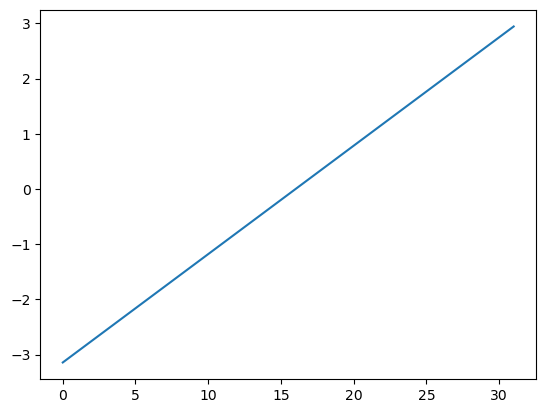

In [96]:
import matplotlib.pyplot as plt
# M  = QFT_matrix(32) @ L_P(32) @ IQFT_matrix(32)
# plt.plot(np.diag(M).real)
# plt.plot(np.sqrt(-spectrum_P(32)))
plt.plot(linear_spectrum_P(32))
# plt.plot(linear_spectrum_N(32))

In [269]:
n = 5
t = 0.1
qc = QuantumCircuit(n+1)
for i in range(-1,n):
    qc.p(-np.pi*t*(2**(n-i)),i+1)
for i in range(0,n):
    qc.cp(np.pi*t*(2**(n-i+1)),0,i+1)
qc.draw()

┌────────────┐                                                     
q_0: ┤ P(-20.106) ├─■───────────■──────────■─────────■─────────■────────
     ├───────────┬┘ │P(20.106)  │          │         │         │        
q_1: ┤ P(-16π/5) ├──■───────────┼──────────┼─────────┼─────────┼────────
     └┬──────────┤              │P(16π/5)  │         │         │        
q_2: ─┤ P(-8π/5) ├──────────────■──────────┼─────────┼─────────┼────────
      ├──────────┤                         │P(8π/5)  │         │        
q_3: ─┤ P(-4π/5) ├─────────────────────────■─────────┼─────────┼────────
      ├──────────┤                                   │P(4π/5)  │        
q_4: ─┤ P(-2π/5) ├───────────────────────────────────■─────────┼────────
      ├─────────┬┘                                             │P(2π/5) 
q_5: ─┤ P(-π/5) ├──────────────────────────────────────────────■────────
      └─────────┘

In [270]:
v1 = np.diag(Operator(qc.reverse_bits()).data)

In [271]:
v2 = np.exp(np.kron([1,-1],linear_spectrum_P(2**n) * 2**n) * -1j * t)

In [272]:
np.log(v1)*5/(1j*np.pi)

array([ 0.00000000e+00+0.00000000e+00j, -1.00000000e+00-4.41743706e-17j,
       -2.00000000e+00+5.52179632e-17j, -3.00000000e+00-9.93923338e-17j,
       -4.00000000e+00-0.00000000e+00j, -5.00000000e+00-9.80868066e-33j,
        4.00000000e+00-8.83487412e-17j,  3.00000000e+00-2.09828260e-16j,
        2.00000000e+00-1.10435926e-17j,  1.00000000e+00+0.00000000e+00j,
        4.41743706e-16-6.13042541e-32j, -1.00000000e+00-0.00000000e+00j,
       -2.00000000e+00+5.52179632e-17j, -3.00000000e+00-9.93923338e-17j,
       -4.00000000e+00+8.83487412e-17j, -5.00000000e+00-1.98625783e-31j,
        4.00000000e+00+0.00000000e+00j,  3.00000000e+00+3.31307779e-17j,
        2.00000000e+00+9.93923338e-17j,  1.00000000e+00+1.76697482e-16j,
        8.83487412e-16-2.45217017e-31j, -1.00000000e+00-4.41743706e-17j,
       -2.00000000e+00+1.10435926e-16j, -3.00000000e+00+6.62615559e-17j,
       -4.00000000e+00+8.83487412e-17j, -5.00000000e+00-2.96712590e-31j,
        4.00000000e+00+1.76697482e-16j,  3.00000000

In [273]:
np.log(v2/v2[0])*5/(1j*np.pi)

array([ 0.00000000e+00+0.00000000e+00j, -1.00000000e+00+4.41743706e-17j,
       -2.00000000e+00+2.20871853e-17j, -3.00000000e+00+1.43566704e-16j,
       -4.00000000e+00-0.00000000e+00j, -5.00000000e+00-2.56794594e-32j,
        4.00000000e+00+1.32523112e-16j,  3.00000000e+00-3.31307779e-17j,
        2.00000000e+00-1.76697482e-16j,  1.00000000e+00+4.41743706e-17j,
        5.71805064e-16-1.02717837e-31j, -1.00000000e+00-8.83487412e-17j,
       -2.00000000e+00-5.52179632e-17j, -3.00000000e+00-5.52179632e-17j,
       -4.00000000e+00+1.76697482e-16j, -5.00000000e+00-1.08495716e-30j,
        4.00000000e+00+0.00000000e+00j,  3.00000000e+00+1.87741075e-16j,
        2.00000000e+00-4.41743706e-17j,  1.00000000e+00+0.00000000e+00j,
        8.57707596e-16-2.31115134e-31j, -1.00000000e+00+4.41743706e-17j,
       -2.00000000e+00-1.10435926e-17j, -3.00000000e+00-4.41743706e-17j,
       -4.00000000e+00+8.83487412e-17j,  5.00000000e+00-5.77787836e-32j,
        4.00000000e+00+0.00000000e+00j,  3.00000000

In [274]:
abs(v1.conjugate() @ v2)

np.float64(64.0)

In [148]:
x = 0.80901699-0.58778525j
x * x * x * x

(-0.8090169802461293-0.587785238482837j)

In [130]:
np.log(-0.80901699-0.58778525j)/np.pi

np.complex128(-1.5555449755871486e-09-0.79999999977181j)

In [ ]:
np.log(v1)/(-1j * t * 2**n)

array([-0.00000000e+00+0.00000000e+00j,  1.96349541e-01+8.67361738e-18j,
        3.92699082e-01-1.08420217e-17j,  5.89048623e-01+1.95156391e-17j,
        7.85398163e-01-0.00000000e+00j,  9.81747704e-01+1.92592994e-33j,
       -7.85398163e-01+1.73472348e-17j, -5.89048623e-01+4.11996826e-17j,
       -3.92699082e-01+2.16840434e-18j, -1.96349541e-01+0.00000000e+00j,
       -8.67361738e-17+1.20370622e-32j,  1.96349541e-01-0.00000000e+00j,
        3.92699082e-01-1.08420217e-17j,  5.89048623e-01+1.95156391e-17j,
        7.85398163e-01-1.73472348e-17j,  9.81747704e-01+3.90000814e-32j,
       -7.85398163e-01+0.00000000e+00j, -5.89048623e-01-6.50521303e-18j,
       -3.92699082e-01-1.95156391e-17j, -1.96349541e-01-3.46944695e-17j,
       -1.73472348e-16+4.81482486e-32j,  1.96349541e-01+8.67361738e-18j,
        3.92699082e-01-2.16840434e-17j,  5.89048623e-01-1.30104261e-17j,
        7.85398163e-01-1.73472348e-17j,  9.81747704e-01+5.82593808e-32j,
       -7.85398163e-01-3.46944695e-17j, -5.89048623

In [85]:
np.log(v2)/(-1j * t)

array([ 2.51327412e+01-0.00000000e+00j, -3.14159265e+01+6.74891902e-31j,
       -2.51327412e+01-2.77555756e-16j, -1.88495559e+01-4.16333634e-16j,
       -1.25663706e+01+5.55111512e-16j, -6.28318531e+00+0.00000000e+00j,
        2.44929360e-15+2.99951957e-31j,  6.28318531e+00+5.55111512e-16j,
        1.25663706e+01+6.93889390e-17j,  1.88495559e+01-0.00000000e+00j,
        2.51327412e+01-2.77555756e-16j,  3.14159265e+01+2.93158766e-30j,
       -2.51327412e+01+0.00000000e+00j, -1.88495559e+01-4.16333634e-16j,
       -1.25663706e+01-3.46944695e-16j, -6.28318531e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j,  6.28318531e+00-0.00000000e+00j,
        1.25663706e+01-3.46944695e-16j,  1.88495559e+01-4.16333634e-16j,
        2.51327412e+01-0.00000000e+00j, -3.14159265e+01+2.93158766e-30j,
       -2.51327412e+01+2.77555756e-16j, -1.88495559e+01-3.46944695e-16j,
       -1.25663706e+01+6.93889390e-17j, -6.28318531e+00-2.77555756e-16j,
        1.53142748e-14+1.17263506e-29j,  6.28318531